In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from bitdotio_pandas import BitDotIOPandas
import seaborn as sns
import os
sns.set(font_scale=1.5, style='whitegrid')
plt.rcParams["font.family"] = "sans serif"

RDATA = os.path.join('data', 'raw')
PDATA = os.path.join('data', 'processed')

# Style configuration
COLORS = [
    '#0059ff',
    '#fdbd28',
    '#28D9AA',
    '#EE5149',
    '#060F41',
    '#788995',
    '#FF69B4',
    '#7F00FF',
]
GREY = '#788995'
DARK_GREY = '#060F41'
BLUE = '#0059ff'
DBLUE = '#060F41'
GOLD = '#fdbd28'
GREEN = '#28D9AA'
RED = '#EE5149'
BLACK = '#000000'
WHITE = '#FFFFFF'
LINEWIDTH = 5
LINESPACING = 1.25
FS_SUPTITLE = 30
FS_CAPTION = 24
FS_LABEL = 24
FS_FOOTNOTE = 20

## Part 2: Summer Reading Analysis

The purpose of this notebook is to analyze the datasets prepared and uploaded in summer_reading_pipeline.ipynb

### Download the datasets from bit.io

To get an API key to connect to bit.io, go [here](https://bit.io/bitdotio/seattle_library) (sign up for a free account if needed, and click "connect" above the data preview).

In [2]:
# Create connection to bit.io, you will need your own API key to connect
bpd = BitDotIOPandas(username="bitdotio", repo="seattle_library")

Please enter your bitdotio API key ····························


In [3]:
# Download the audiobook and ebook datasets
dfa = bpd.read_table("audiobook_checkouts_by_title")
dfe = bpd.read_table("ebook_checkouts_by_title")

### How do checkouts vary seasonally?

In [4]:
# Group by year and month to show increase in the summers
dfa_ym_grp = dfa.groupby(['checkout_year', 'checkout_month'], as_index=False).agg({'checkouts': np.sum})
dfe_ym_grp = dfe.groupby(['checkout_year', 'checkout_month'], as_index=False).agg({'checkouts': np.sum})

<ipython-input-22-2be70098f471>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([i for i in range(20, 160, 20)], color=DARK_GREY, fontsize=FS_LABEL, alpha=0.6)


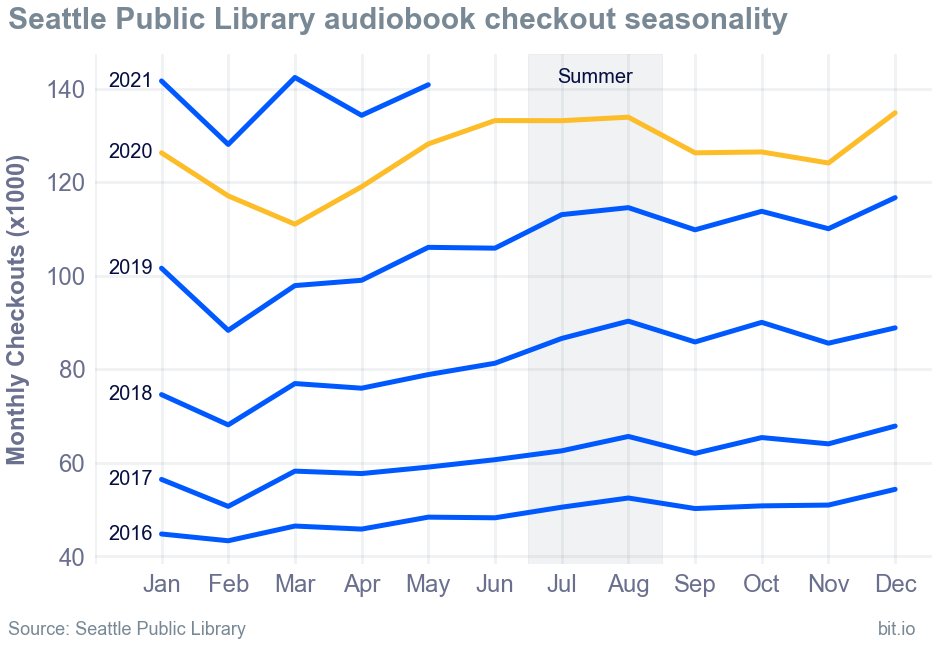

In [22]:
# Plot audiobooks
df = dfa_ym_grp
fig, ax = plt.subplots(figsize=(15, 15/1.6))
for year in sorted(list(df['checkout_year'].unique())):
    df_temp = df.loc[df['checkout_year'] == year].copy()
    if year == 2020:
        ax.plot(df_temp['checkout_month'], df_temp['checkouts'], label=year, color=GOLD, linewidth=LINEWIDTH, alpha=1.0)
    else:
        ax.plot(df_temp['checkout_month'], df_temp['checkouts'], label=year, color=BLUE, linewidth=LINEWIDTH, alpha=1.0)
    ax.text(0.2, df_temp['checkouts'].iloc[0], str(year), color=DARK_GREY, fontsize=FS_CAPTION - 4, va='center')
ax.axvspan(6.5, 8.5, color=GREY, alpha=0.1)
ax.grid(b=True, color=GREY, alpha=0.1, linewidth=3)
ax.set_xticks([i for i in range(0,13)])
ax.set_yticklabels([i for i in range(20, 160, 20)], color=DARK_GREY, fontsize=FS_LABEL, alpha=0.6)
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.set_xticklabels(['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], color=DARK_GREY, fontsize=FS_LABEL, alpha=0.6)
ax.set_ylabel('Monthly Checkouts (x1000)', fontweight='bold', fontsize=FS_CAPTION, labelpad=15, color=DARK_GREY, alpha=0.6)
ax.text(7.5, 142500, 'Summer', color=DARK_GREY, fontsize=FS_CAPTION - 4, va='center', ha='center')
fig.suptitle('Seattle Public Library audiobook checkout seasonality', x=0.045, y=0.95, ha='left', fontweight='bold', fontsize=FS_SUPTITLE, color=GREY)
fig.text(0.045, 0.02, 'Source: Seattle Public Library', color=GREY)
fig.text(0.85, 0.02, 'bit.io', color=GREY)
plt.show()

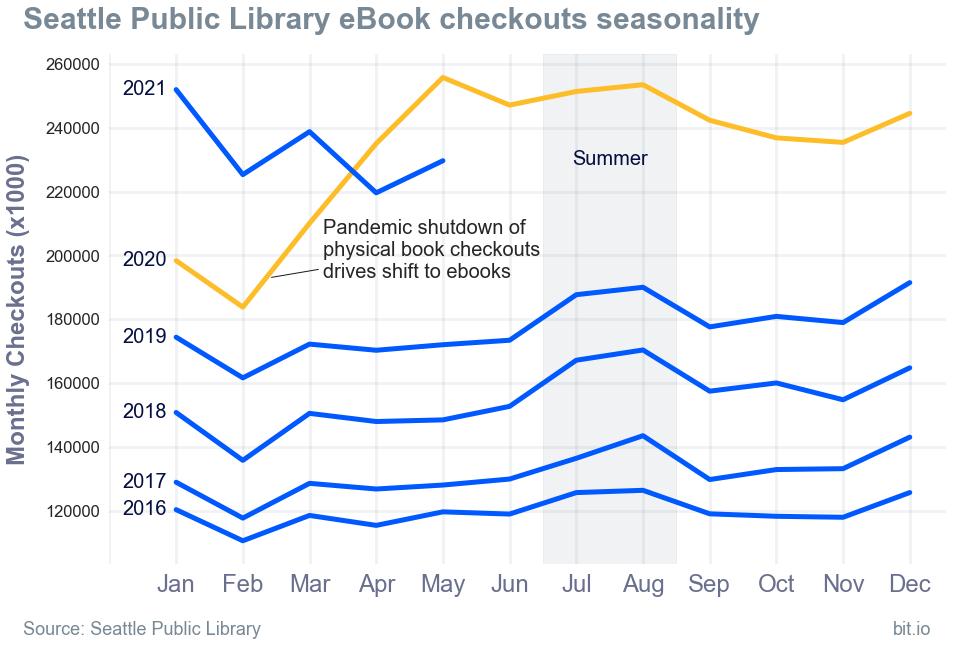

In [23]:
# Plot eBooks
df = dfe_ym_grp
fig, ax = plt.subplots(figsize=(15, 15/1.6))
for year in sorted(list(df['checkout_year'].unique())):
    df_temp = df.loc[df['checkout_year'] == year].copy()
    if year == 2020:
        ax.plot(df_temp['checkout_month'], df_temp['checkouts'], label=year, color=GOLD, linewidth=LINEWIDTH, alpha=1.0)
    else:
        ax.plot(df_temp['checkout_month'], df_temp['checkouts'], label=year, color=BLUE, linewidth=LINEWIDTH, alpha=1.0)
    ax.text(0.2, df_temp['checkouts'].iloc[0], str(year), color=DARK_GREY, fontsize=FS_CAPTION - 4, va='center')
ax.axvspan(6.5, 8.5, color=GREY, alpha=0.1)
ax.grid(b=True, color=GREY, alpha=0.1, linewidth=3)
ax.set_xticks([i for i in range(0,13)])
#ax.set_yticklabels([i for i in range(100, 280, 20)], color=DARK_GREY, fontsize=FS_LABEL, alpha=0.6)
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.set_xticklabels(['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], color=DARK_GREY, fontsize=FS_LABEL, alpha=0.6)
ax.set_ylabel('Monthly Checkouts (x1000)', fontweight='bold', fontsize=FS_CAPTION, labelpad=15, color=DARK_GREY, alpha=0.6)
ax.annotate('Pandemic shutdown of\nphysical book checkouts\ndrives shift to ebooks', (2.4, 193000), (3.2, 193000), fontsize=FS_CAPTION - 4, arrowprops={'arrowstyle':'-', 'color':'k'})
ax.text(7.5, 230000, 'Summer', color=DARK_GREY, fontsize=FS_CAPTION - 4, va='center', ha='center')
fig.suptitle('Seattle Public Library eBook checkouts seasonality', x=0.045, y=0.95, ha='left', fontweight='bold', fontsize=FS_SUPTITLE, color=GREY)
fig.text(0.045, 0.02, 'Source: Seattle Public Library', color=GREY)
fig.text(0.85, 0.02, 'bit.io', color=GREY)
plt.show()

### What are the most-checked out audiobooks and ebooks of Jul-Aug?

In [24]:
# Filter datasets to only summer months
dfas = dfa.loc[dfa['checkout_month'].isin([7, 8])].copy()
dfes = dfe.loc[dfe['checkout_month'].isin([7, 8])].copy()

In [25]:
# Now, loop over subjects and get count of checkouts by title, and creator
dfa_checkouts = {}
dfe_checkouts = {}
for subject in ['literature', 'fiction', 'biography_autobiography', 'fantasy',
                'science_fiction', 'mystery', 'history', 'romance', 'thriller',
                'nonfiction', 'juvenile_fiction', 'historical_fiction', 'suspense']:
    dfa_checkouts[subject] = dfas.loc[dfas[subject] == True].groupby(['title', 'creator'], as_index=False).agg({'checkouts': 'sum'}).sort_values('checkouts', ascending=False)
    dfe_checkouts[subject] = dfes.loc[dfes[subject] == True].groupby(['title', 'creator'], as_index=False).agg({'checkouts': 'sum'}).sort_values('checkouts', ascending=False)

In [26]:
# Create table joining all of these together
dfa_all = []
dfe_all = []
for subject in dfa_checkouts.keys():
    for df_dict, df_all in zip([dfa_checkouts, dfe_checkouts], [dfa_all, dfe_all]):
        df_temp = df_dict[subject].iloc[:10, :]
        df_temp.columns = [f'{subject}_{col}' for col in df_temp.columns]
        df_all.append(df_temp.reset_index(drop=True))

In [27]:
# Create viz showing top 10 for fiction and non-fiction for audiobook and ebook
dfa_all = pd.concat(dfa_all, axis=1)
dfe_all = pd.concat(dfe_all, axis=1)

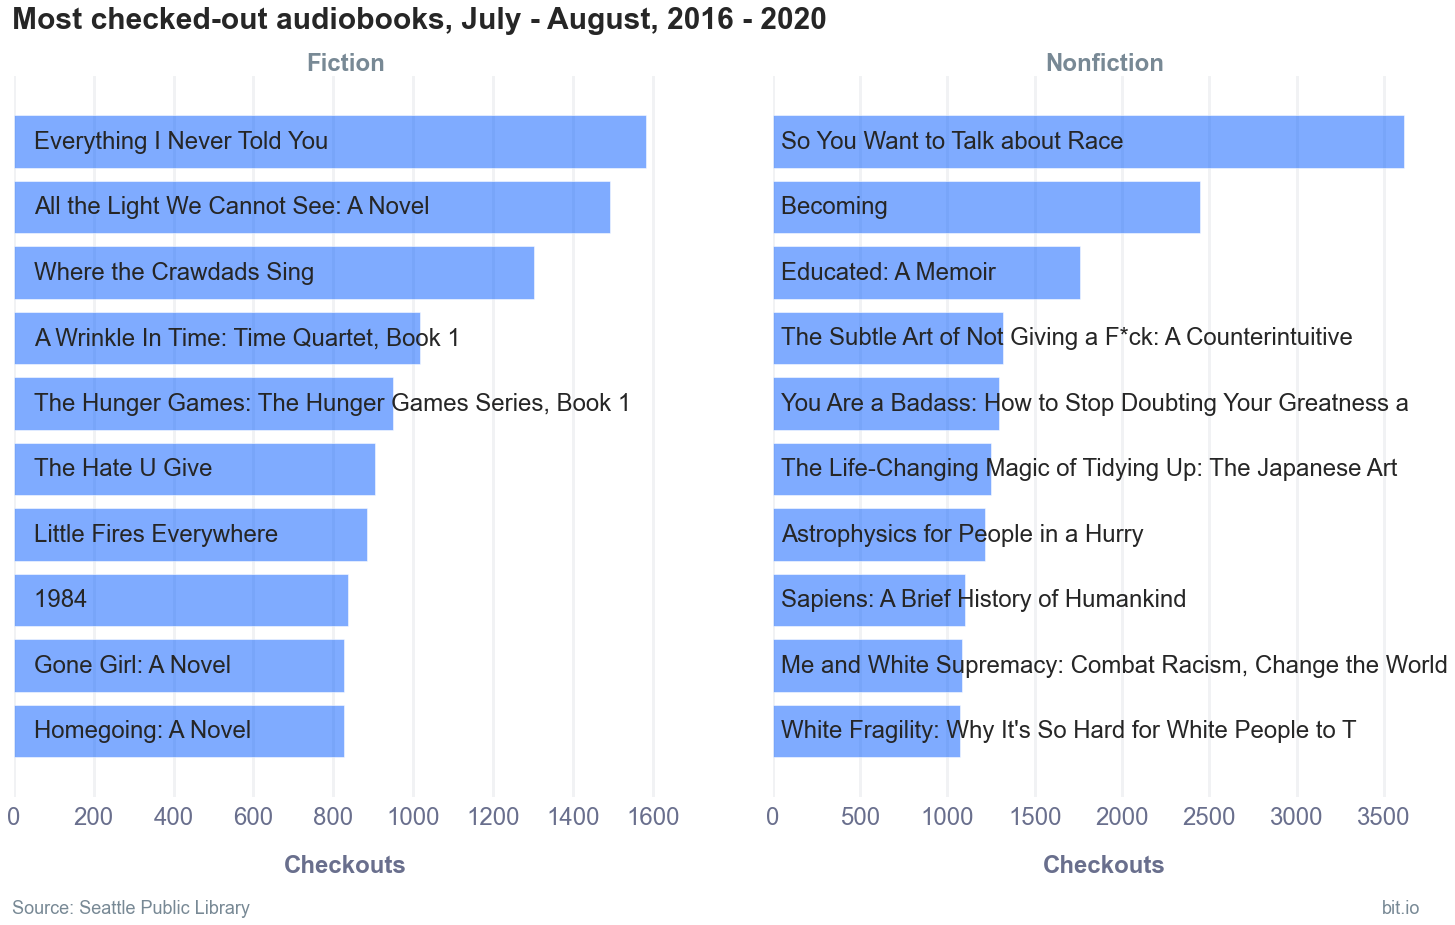

In [52]:
# Annotate and style, then post
df = dfa_all
fig, ax = plt.subplots(1, 2, figsize=(22,12))
titles = ['Fiction', 'Nonfiction']
for i, subject in enumerate(['fiction', 'nonfiction']):
    y = np.arange(10)
    df_temp = df[[col for col in df.columns if f'{subject}_' in col]].sort_values(f'{subject}_checkouts')
    df_temp[f'{subject}_title'] = df_temp[f'{subject}_title'].str.replace('(unabridged)', '', regex=False)
    df_temp[f'{subject}_title'] = df_temp[f'{subject}_title'].str.replace('(Unabridged)', '', regex=False)
    df_temp[f'{subject}_title'] = df_temp[f'{subject}_title'].str.slice(0,55)
    ax[i].barh(y, df_temp[f'{subject}_checkouts'], color=BLUE, alpha=0.5)
    ax[i].set(ylim=(-1,10))
    ax[i].axes.yaxis.set_visible(False)
    ax[i].grid(b=True, color=GREY, alpha=0.1, linewidth=3)
    ax[i].tick_params(colors=DARK_GREY, labelsize=FS_LABEL, which='both')
    plt.setp(ax[i].get_xticklabels(), alpha=0.6)
    for spine in ['top', 'right', 'left', 'bottom']:
        ax[i].spines[spine].set_visible(False)
    for y_pos in y:
        ax[i].text(50, y_pos, df_temp[f'{subject}_title'].iloc[y_pos], va='center', fontsize=FS_CAPTION)
    ax[i].set_xlabel('Checkouts', fontweight='bold', fontsize=FS_CAPTION, labelpad=25, color=DARK_GREY, alpha=0.6)
    ax[i].set_title(titles[i], color=GREY, fontsize=FS_LABEL, fontweight='bold')
fig.tight_layout()
fig.suptitle('Most checked-out audiobooks, July - August, 2016 - 2020 ', x=0.015, y=1.03, ha='left', fontweight='bold', fontsize=FS_SUPTITLE)
fig.text(0.015, -0.02, 'Source: Seattle Public Library', color=GREY)
fig.text(0.88,  -0.02, 'bit.io', color=GREY)
plt.show()

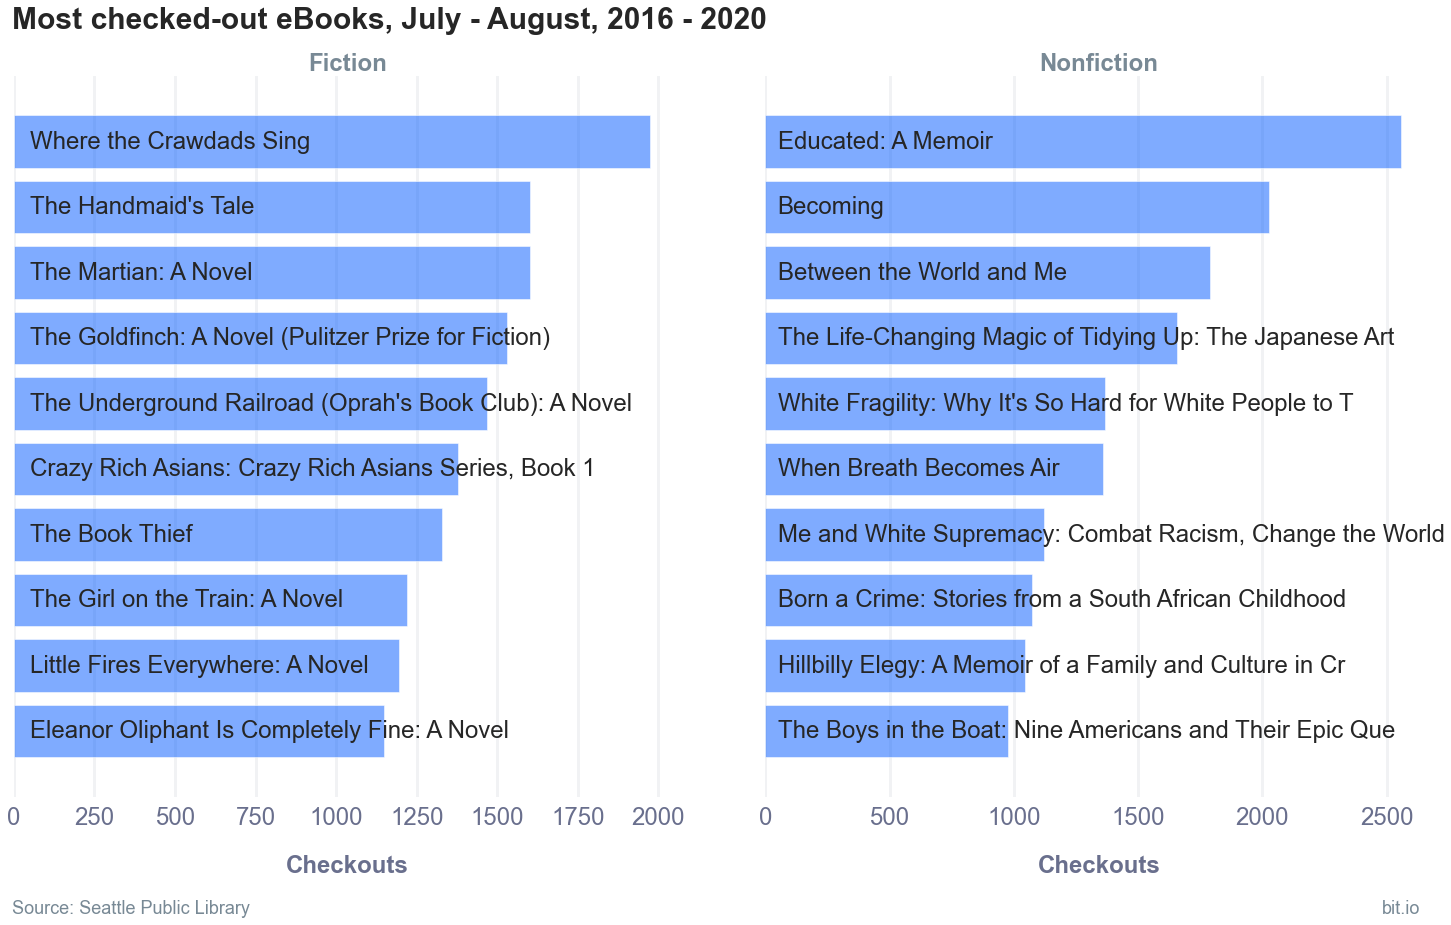

In [53]:
# Annotate and style, then post
df = dfe_all
fig, ax = plt.subplots(1, 2, figsize=(22,12))
titles = ['Fiction', 'Nonfiction']
for i, subject in enumerate(['fiction', 'nonfiction']):
    y = np.arange(10)
    df_temp = df[[col for col in df.columns if f'{subject}_' in col]].sort_values(f'{subject}_checkouts')
    df_temp[f'{subject}_title'] = df_temp[f'{subject}_title'].str.replace('(unabridged)', '', regex=False)
    df_temp[f'{subject}_title'] = df_temp[f'{subject}_title'].str.replace('(Unabridged)', '', regex=False)
    df_temp[f'{subject}_title'] = df_temp[f'{subject}_title'].str.slice(0,55)
    ax[i].barh(y, df_temp[f'{subject}_checkouts'], color=BLUE, alpha=0.5)
    ax[i].set(ylim=(-1,10))
    ax[i].axes.yaxis.set_visible(False)
    ax[i].grid(b=True, color=GREY, alpha=0.1, linewidth=3)
    ax[i].tick_params(colors=DARK_GREY, labelsize=FS_LABEL, which='both')
    plt.setp(ax[i].get_xticklabels(), alpha=0.6)
    for spine in ['top', 'right', 'left', 'bottom']:
        ax[i].spines[spine].set_visible(False)
    for y_pos in y:
        ax[i].text(50, y_pos, df_temp[f'{subject}_title'].iloc[y_pos], va='center', fontsize=FS_CAPTION)
    ax[i].set_xlabel('Checkouts', fontweight='bold', fontsize=FS_CAPTION, labelpad=25, color=DARK_GREY, alpha=0.6)
    ax[i].set_title(titles[i], color=GREY, fontsize=FS_LABEL, fontweight='bold')
fig.tight_layout()
fig.suptitle('Most checked-out eBooks, July - August, 2016 - 2020 ', x=0.015, y=1.03, ha='left', fontweight='bold', fontsize=FS_SUPTITLE)
fig.text(0.015, -0.02, 'Source: Seattle Public Library', color=GREY)
fig.text(0.88,  -0.02, 'bit.io', color=GREY)
plt.show()

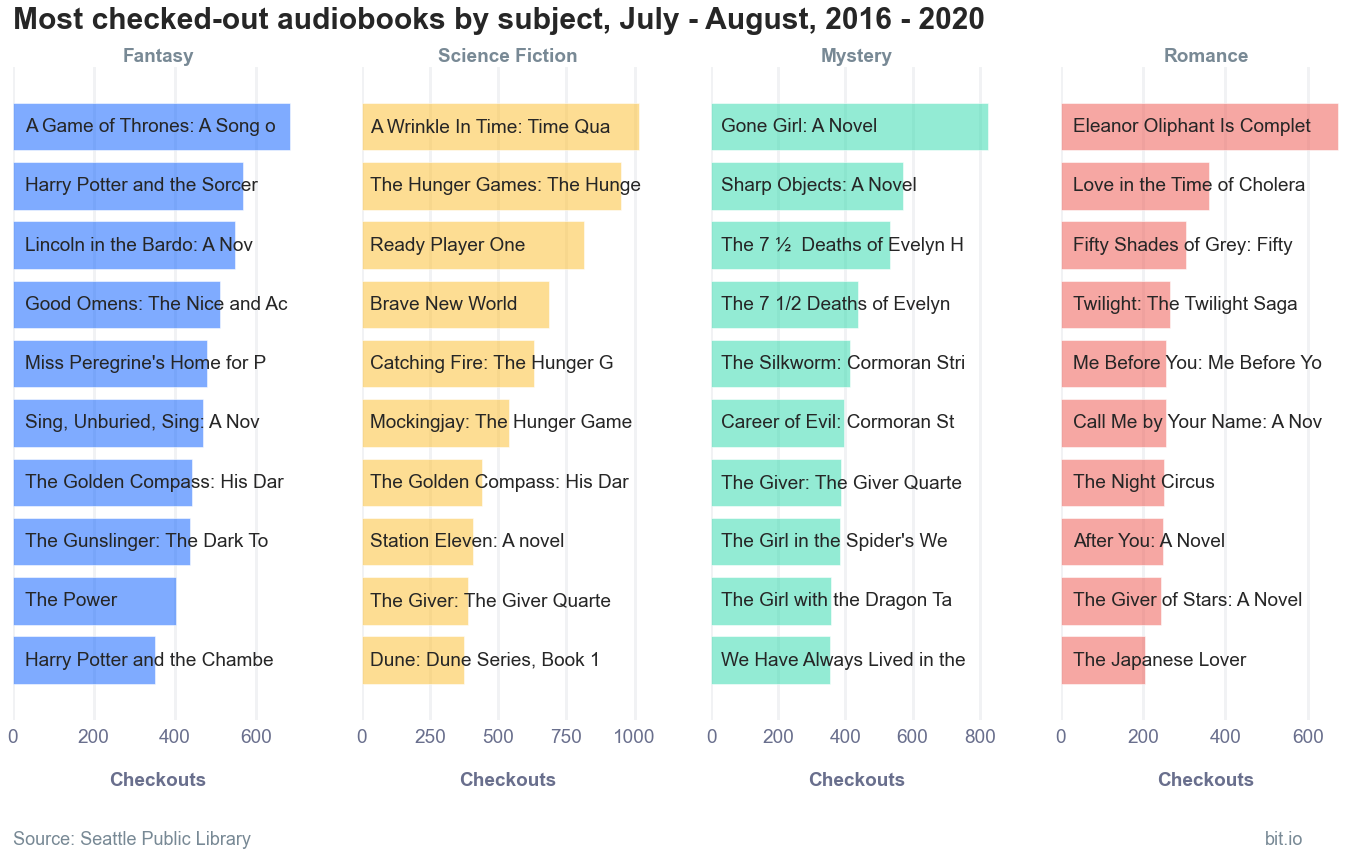

In [65]:
# Annotate and style, then post
df = dfa_all
fig, ax = plt.subplots(1, 4, figsize=(24,12))
titles = ['Fantasy', 'Science Fiction', 'Mystery', 'Romance']
for i, subject in enumerate(['fantasy', 'science_fiction', 'mystery', 'romance']):
    y = np.arange(10)
    df_temp = df[[col for col in df.columns if f'{subject}_' in col]].sort_values(f'{subject}_checkouts')
    df_temp[f'{subject}_title'] = df_temp[f'{subject}_title'].str.replace('(unabridged)', '', regex=False)
    df_temp[f'{subject}_title'] = df_temp[f'{subject}_title'].str.replace('(Unabridged)', '', regex=False)
    df_temp[f'{subject}_title'] = df_temp[f'{subject}_title'].str.slice(0,27)
    ax[i].barh(y, df_temp[f'{subject}_checkouts'], color=COLORS[i], alpha=0.5)
    ax[i].set(ylim=(-1,10))
    ax[i].axes.yaxis.set_visible(False)
    ax[i].grid(b=True, color=GREY, alpha=0.1, linewidth=3)
    ax[i].tick_params(colors=DARK_GREY, labelsize=FS_LABEL - 5, which='both')
    plt.setp(ax[i].get_xticklabels(), alpha=0.6)
    for spine in ['top', 'right', 'left', 'bottom']:
        ax[i].spines[spine].set_visible(False)
    for y_pos in y:
        ax[i].text(30, y_pos, df_temp[f'{subject}_title'].iloc[y_pos], va='center', fontsize=FS_CAPTION - 5)
    ax[i].set_xlabel('Checkouts', fontweight='bold', fontsize=FS_CAPTION - 5, labelpad=25, color=DARK_GREY, alpha=0.6)
    ax[i].set_title(titles[i], color=GREY, fontsize=FS_LABEL - 5, fontweight='bold')
fig.suptitle('Most checked-out audiobooks by subject, July - August, 2016 - 2020 ', x=0.125, y=0.95, ha='left', fontweight='bold', fontsize=FS_SUPTITLE)
fig.text(0.125, -0.02, 'Source: Seattle Public Library', color=GREY)
fig.text(0.85,  -0.02, 'bit.io', color=GREY)
plt.show()

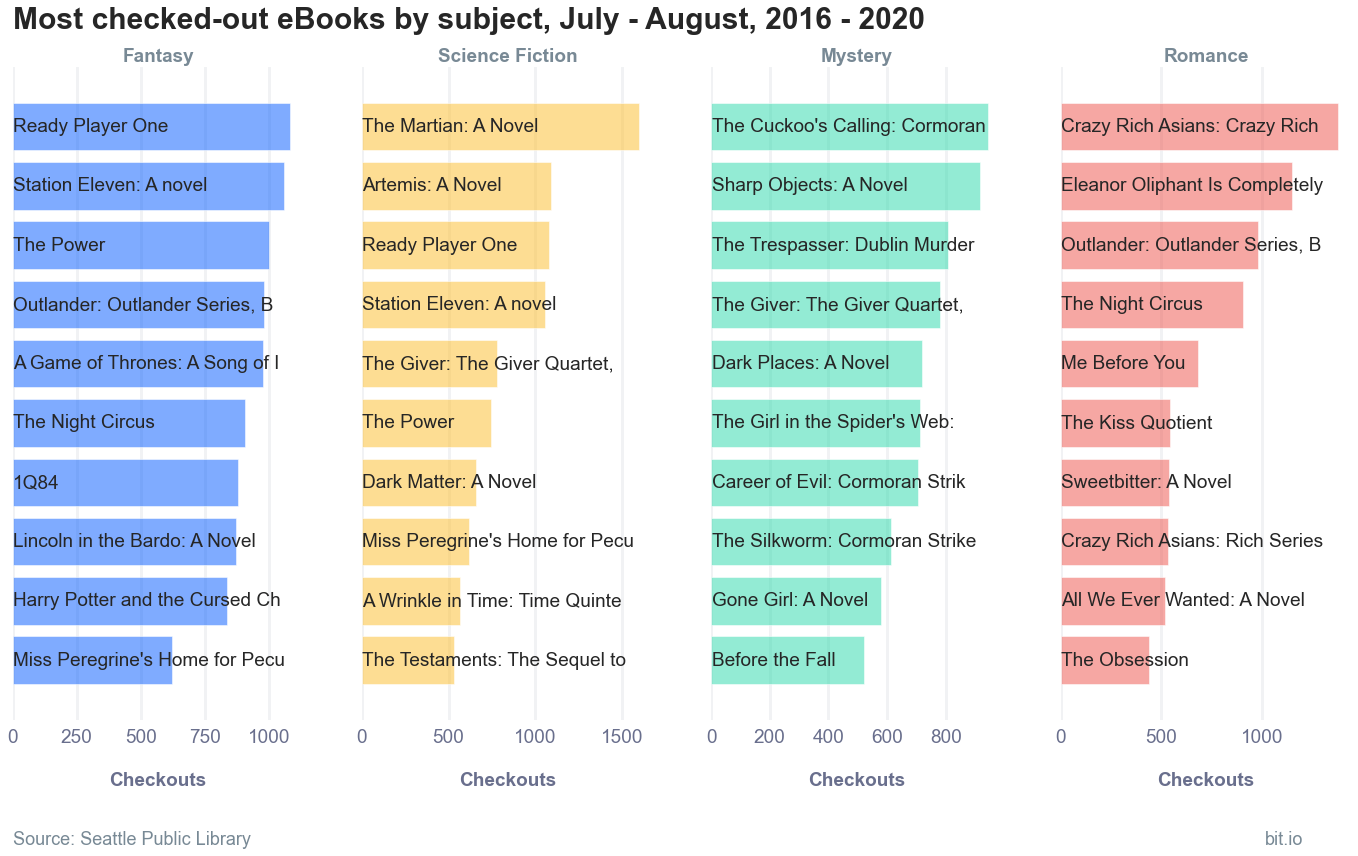

In [67]:
# Annotate and style, then post
df = dfe_all
fig, ax = plt.subplots(1, 4, figsize=(24,12))
titles = ['Fantasy', 'Science Fiction', 'Mystery', 'Romance']
for i, subject in enumerate(['fantasy', 'science_fiction', 'mystery', 'romance']):
    y = np.arange(10)
    df_temp = df[[col for col in df.columns if f'{subject}_' in col]].sort_values(f'{subject}_checkouts')
    df_temp[f'{subject}_title'] = df_temp[f'{subject}_title'].str.replace('(unabridged)', '', regex=False)
    df_temp[f'{subject}_title'] = df_temp[f'{subject}_title'].str.replace('(Unabridged)', '', regex=False)
    df_temp[f'{subject}_title'] = df_temp[f'{subject}_title'].str.slice(0,30)
    ax[i].barh(y, df_temp[f'{subject}_checkouts'], color=COLORS[i], alpha=0.5)
    ax[i].set(ylim=(-1,10))
    #ax[i].set_xlabel(f"Difference, IGN Score vs. Metascore", fontweight='bold')
    ax[i].axes.yaxis.set_visible(False)
    #ax[i].text(4, 20, 'IGN Rated Higher', va='center', fontweight='bold', fontsize=18)
    #ax[i].arrow(0, 20, 3, 0, color='k', width=0.08)
    #ax[i].text(-4, -1, 'IGN Rated Lower', va='center', ha='right', fontweight='bold', fontsize=18)
    #ax[i].arrow(0, -1, -3, 0, color='k', width=0.08)
    ax[i].grid(b=True, color=GREY, alpha=0.1, linewidth=3)
    ax[i].tick_params(colors=DARK_GREY, labelsize=FS_LABEL - 5, which='both')
    plt.setp(ax[i].get_xticklabels(), alpha=0.6)
    for spine in ['top', 'right', 'left', 'bottom']:
        ax[i].spines[spine].set_visible(False)
    for y_pos in y:
        ax[i].text(1, y_pos, df_temp[f'{subject}_title'].iloc[y_pos], va='center', fontsize=FS_CAPTION - 5)
    ax[i].set_xlabel('Checkouts', fontweight='bold', fontsize=FS_CAPTION - 5, labelpad=25, color=DARK_GREY, alpha=0.6)
    ax[i].set_title(titles[i], color=GREY, fontsize=FS_LABEL - 5, fontweight='bold')
fig.suptitle('Most checked-out eBooks by subject, July - August, 2016 - 2020 ', x=0.125, y=0.95, ha='left', fontweight='bold', fontsize=FS_SUPTITLE)
fig.text(0.125, -0.02, 'Source: Seattle Public Library', color=GREY)
fig.text(0.85,  -0.02, 'bit.io', color=GREY)
plt.show()

### Upload final top-10 per subject and format to tables on bit.io

In [68]:
# Create tables joining all of these together
dfa_all = []
dfe_all = []
for subject in dfa_checkouts.keys():
    for df_dict, df_all in zip([dfa_checkouts, dfe_checkouts], [dfa_all, dfe_all]):
        df_temp = df_dict[subject].iloc[:10, :].copy()
        df_temp['subject'] = subject
        df_temp['rank'] = np.arange(1,11)
        df_all.append(df_temp.reset_index(drop=True))

In [69]:
# Create viz showing top 10 for fiction and non-fiction for audiobook and ebook
dfa_all = pd.concat(dfa_all, axis=0)
dfe_all = pd.concat(dfe_all, axis=0)

In [ ]:
bpd.to_table(dfa_all, 'top_summer_audiobooks')

In [ ]:
bpd.to_table(dfe_all, 'top_summer_ebooks')